# **Testicular Germ Cell Tumor Analysis**

This notebook uses 3 datasets:
- cBioportal
- The Cancer Genome Atlas
- Kaggle

In [2]:
# mount drive for colab
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'CSE428/'
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/CSE428


In [3]:
# dependencies
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import tarfile
import os
import seaborn as sns
from tqdm import tqdm

# Data Loading and Preliminary Exploration

In [4]:
# load the cBioPortal Data
# assumes file structure is /content/drive/$FOLDERNAME/data/tgct_tcga_pan_can_atlas_2018.tar.gz

# uncomment to re-extract data
# !tar -xzvf "/content/drive/" + FOLDERNAME + "/tgct_tcga_pan_can_atlas_2018.tar.gz" -C "/content/drive/" FOLDERNAME + "/cbioportal/"

In [5]:
%pwd

'/content/drive/My Drive/CSE428'

In [6]:
# load the Kaggle Data
# assumes file structure is /content/drive/$FOLDERNAME/data/Kaggle Testicular Cancer Dataset.csv

kaggle = pd.read_csv('./data/Kaggle Testicular Cancer Dataset.csv')

kaggle.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Lymph Node Stage Code.1,American Joint Committee on Cancer Lymph Node Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,...,Serum markers,Sex,Tumor Tissue Site,Somatic Status,Testis tumor macroextent,Testis tumor microextent,Tissue Source Site,TMB (nonsynonymous),Person Neoplasm Status,Vial number
0,tgct_tcga,TCGA-2G-AAEW,TCGA-2G-AAEW-01,31.0,Stage IS,M0,M0,N0,T1,N0,...,S1,MALE,Testes,Matched,Involves testis only,Rete Testis,2G,1.400000,WITH TUMOR,A
1,tgct_tcga,TCGA-2G-AAEX,TCGA-2G-AAEX-01,38.0,Stage IS,M0,M0,N0,T1,N0,...,S1,Male,Testes,Matched,Involves extratesticular structures: Tunica al...,NaN,2G,1.933333,TUMOR FREE,A
2,tgct_tcga,TCGA-2G-AAF1,TCGA-2G-AAF1-01,28.0,Stage IS,M0,M0,N0,T1,N0,...,S1,Male,Testes,Matched,Involves testis only,Rete Testis,2G,1.166667,TUMOR FREE,A
3,tgct_tcga,TCGA-2G-AAF4,TCGA-2G-AAF4-01,30.0,Stage IA,M0,M0,N0,T1,N0,...,S0,Male,Testes,Matched,Involves testis only,Rete Testis,2G,1.500000,TUMOR FREE,A
4,tgct_tcga,TCGA-2G-AAF6,TCGA-2G-AAF6-01,28.0,Stage IS,M0,M0,N0,T1,N0,...,S1,Male,Testes,Matched,Involves testis only,NaN,2G,1.600000,TUMOR FREE,A


In [7]:
# kaggle.keys()

In [8]:
# load the Cancer Genome Atlas Data
# assumes file structure is /content/drive/$FOLDERNAME/data/tcga-tgct/*
# in that folder there should be an annotations, biospecimen, and clinical JSON files. As well as a manifest

file_path = f'./data/tcga-tgct annotations'
file_date = '2025-04-22'
# annotation = pd.read_json(f'{file_path}/annotations.{file_date}.json')
# biospecimen = pd.read_json(f'{file_path}/biospecimen.project-tcga-tgct.{file_date}.json')
# clinical = pd.read_json(f'{file_path}/clinical.project-tcga-tgct.{file_date}.json')

# pandas probably not the best for this since it's heavily nested JSON data

with open(f'{file_path}/annotations.{file_date}.json') as file:
  annotation = json.load(file)

with open(f'{file_path}/biospecimen.project-tcga-tgct.{file_date}.json') as file:
  biospecimen = json.load(file)

with open(f'{file_path}/clinical.project-tcga-tgct.{file_date}.json') as file:
  clinical = json.load(file)

In [9]:
print("Annotation keys:", annotation[0].keys())
print("Biospecimen keys:", biospecimen[0].keys())
print("Clinical keys:", clinical[0].keys())

Annotation keys: dict_keys(['annotation_id', 'entity_submitter_id', 'notes', 'entity_type', 'case_id', 'project', 'classification', 'entity_id', 'category', 'created_datetime', 'status', 'case_submitter_id'])
Biospecimen keys: dict_keys(['case_id', 'project', 'submitter_id', 'samples'])
Clinical keys: dict_keys(['lost_to_followup', 'family_histories', 'disease_type', 'project', 'submitter_id', 'days_to_consent', 'diagnoses', 'consent_type', 'demographic', 'primary_site', 'updated_datetime', 'case_id', 'follow_ups', 'index_date', 'state'])


In [10]:
biospecimen[0]['samples'][0].keys()

dict_keys(['sample_type_id', 'tumor_descriptor', 'sample_id', 'submitter_id', 'sample_type', 'oct_embedded', 'specimen_type', 'composition', 'updated_datetime', 'days_to_collection', 'state', 'is_ffpe', 'preservation_method', 'tissue_type', 'portions'])

In [11]:
# biospecimen[0]['samples'][0]['portions'][0]

In [12]:
print("Kaggle len:", len(kaggle))
print("Annotation len:", len(annotation))
print("Biospecimen len:", len(biospecimen))
print("Clinical len:", len(clinical))

Kaggle len: 156
Annotation len: 926
Biospecimen len: 263
Clinical len: 263


In [13]:
print("Annotation IDs")
print('case_id ex:', annotation[0]['case_id'])
print('annotation_id ex:', annotation[0]['annotation_id'])
print('entity_submitter_id ex:', annotation[0]['entity_submitter_id'])
print('entity_id ex:', annotation[0]['entity_id'])
print('case_submitter_id ex:', annotation[0]['case_submitter_id'])
print('annotation_id ex:', annotation[0]['annotation_id'])

print("\nBiospeciment IDs")
print('case_id ex:', biospecimen[0]['case_id'])
print('submitter_id ex:', biospecimen[0]['submitter_id'])

print('\nClinical IDs')
print('submitter_id ex:', clinical[0]['submitter_id'])
print('case_id ex:', clinical[0]['case_id'])


Annotation IDs
case_id ex: 814a95ad-02f8-44fe-9765-2da3183a2ef5
annotation_id ex: 010ff6a3-0805-4303-9cb4-03d3b2937f76
entity_submitter_id ex: f54620f2-7857-4cdf-b0bf-773462bbf102
entity_id ex: 7ba8bb8c-0e69-4d38-b6dc-343c5d0dbb6f
case_submitter_id ex: TCGA-YU-A90Y
annotation_id ex: 010ff6a3-0805-4303-9cb4-03d3b2937f76

Biospeciment IDs
case_id ex: 02461e5d-eee8-4222-8b6d-bf141aad9440
submitter_id ex: TCGA-XY-A8S3

Clinical IDs
submitter_id ex: TCGA-XY-A8S3
case_id ex: 02461e5d-eee8-4222-8b6d-bf141aad9440


In [14]:
target_id = 'TCGA-YU-A90Y' # case_submitter_id from annotations

for i, annot in enumerate(annotation):
  if annot['case_submitter_id'] == target_id:
    print(f'found id: {target_id} on row {i} of annotation')
print('loop done')

found id: TCGA-YU-A90Y on row 0 of annotation
found id: TCGA-YU-A90Y on row 332 of annotation
found id: TCGA-YU-A90Y on row 530 of annotation
found id: TCGA-YU-A90Y on row 567 of annotation
found id: TCGA-YU-A90Y on row 765 of annotation
loop done


In [15]:
target_id = 'TCGA-YU-A90Y' # case_submitter_id from annotations

for i, biospec in enumerate(biospecimen):
  if biospec['submitter_id'] == target_id:
    print(f'found id: {target_id} on row {i} of biospecimen')
print('loop done')

found id: TCGA-YU-A90Y on row 143 of biospecimen
loop done


In [16]:
# biospecimen[143]
# annotation[0]

In [17]:
target_id = 'TCGA-YU-A90Y' # case_submitter_id from annotations

for i, clinic in enumerate(clinical):
  if clinic['submitter_id'] == target_id:
    print(f'found id: {target_id} on row {i} of clinical')
print('loop done')

found id: TCGA-YU-A90Y on row 143 of clinical
loop done


In [18]:
def get_row_of_id(dataset, id: str, dataset_name: str, should_print=False):
  '''
  dataset is the panda df
  id is the string: ex TCGA-2G-AAFE
  should print = true means it'll print whether it finds it or not
  name is either 'kaggle', 'clinical', 'biospecimen', or 'annotation'

  also returns the row it's found on
  '''
  found = -1
  if dataset_name == 'kaggle':
    for i, kaggle_row in enumerate(dataset.iterrows()):
      if kaggle_row[1]['Patient ID'] == id:
        found = True
        if should_print:
          print(f'found id: {id} on row {i} of kaggle')
  else:
    for i, clinic in enumerate(dataset):
      if clinic['submitter_id'] == id:
        found = i
        if should_print:
          print(f'found id: {id} on row {i} of {dataset_name}')
  return found

In [19]:
clinical[110]['diagnoses'][0]['primary_diagnosis']

'Embryonal carcinoma, NOS'

In [20]:
target_id = 'TCGA-2G-AAFE' # case_submitter_id from annotations

for i, kaggle_row in enumerate(kaggle.iterrows()):
  if kaggle_row[1]['Patient ID'] == target_id:
    print(f'found id: {target_id} on row {i} of kaggle')
print('loop done')

found id: TCGA-2G-AAFE on row 6 of kaggle
loop done


In [21]:
kaggle.loc[2]

,2
Study ID,tgct_tcga
Patient ID,TCGA-2G-AAF1
Sample ID,TCGA-2G-AAF1-01
Diagnosis Age,28.0
Neoplasm Disease Stage American Joint Committee on Cancer Code,Stage IS
...,...
Testis tumor microextent,Rete Testis
Tissue Source Site,2G
TMB (nonsynonymous),1.166667
Person Neoplasm Status,TUMOR FREE


---
### Conclusion from above
Clinical and biospecimen data are 1:1. Row 143 for both correspond to the same patient ID. In Annotation this patient has data on rows 0, 332, 530, 567, and 765.

The interesting part is that this exact patient data exists in the kaggle data on row 142. Now I want to see if these match 1:1.

In [22]:
def describe_kaggle_patient(index):
  patient_data = kaggle.loc[index]
  print(f'Patient ID: {patient_data["Patient ID"]}')
  print(f"\tTesticle side: {patient_data['Primary Tumor Laterality']}")
  print(f"\tAjcc cancer Stage: {patient_data['Neoplasm Disease Stage American Joint Committee on Cancer Code']}")
  print(f"\tDiagnosis Year: {patient_data['Year Cancer Initial Diagnosis']}")
  print(f"\tSurvival Status: {patient_data['Overall Survival Status']}")
  print(f"\tRace: {patient_data['Race Category']}")
  print(f"\tCancer Type: {patient_data['Cancer Type']}")

def describe_clinical_patient(index):
  patient_data = clinical[index]['diagnoses'][0]
  print(f'Patient ID: {clinical[index]["submitter_id"]}')
  print(f"\tTesticle side: {patient_data['laterality']}")
  print(f"\tAjcc cancer Stage: {patient_data['ajcc_pathologic_stage']}")
  print(f"\tAge at diagnosis: {patient_data['age_at_diagnosis']}")
  print(f"\tSurvival Status: {clinical[index]['demographic']['vital_status']}")
  print(f"\tRace: {clinical[index]['demographic']['race']}")
  print(f"\tCancer Type: {patient_data['primary_diagnosis']}")

In [23]:
describe_kaggle_patient(142)

Patient ID: TCGA-YU-A90Y
	Testicle side: Left
	Ajcc cancer Stage: Stage IIIC
	Diagnosis Year: 2011.0
	Survival Status: 1:DECEASED
	Race: BLACK OR AFRICAN AMERICAN
	Cancer Type: Germ Cell Tumor


In [24]:
describe_clinical_patient(143)

Patient ID: TCGA-YU-A90Y
	Testicle side: Left
	Ajcc cancer Stage: Stage IIIC
	Age at diagnosis: 8460
	Survival Status: Dead
	Race: black or african american
	Cancer Type: Embryonal carcinoma, NOS


---
It's the same person. Time to see if the rows match up

In [25]:
describe_kaggle_patient(2)
describe_clinical_patient(35)

Patient ID: TCGA-2G-AAF1
	Testicle side: Right
	Ajcc cancer Stage: Stage IS
	Diagnosis Year: 2011.0
	Survival Status: 0:LIVING
	Race: ASIAN
	Cancer Type: Germ Cell Tumor
Patient ID: TCGA-2G-AAF1
	Testicle side: Right
	Ajcc cancer Stage: Stage IS
	Age at diagnosis: 10511
	Survival Status: Alive
	Race: asian
	Cancer Type: Seminoma, NOS


In [26]:
get_row_of_id(clinical, 'TCGA-2G-AAF1', 'clinical', True)

found id: TCGA-2G-AAF1 on row 35 of clinical


35

In [27]:
# check if every row exists in clinical from kaggle
all_true = True
for i in range(len(kaggle)):
  patient = kaggle.loc[i]
  id = patient["Patient ID"]
  res = get_row_of_id(clinical, id, 'clinical', False)
  all_true &= res
  if res == False:
    print(f'ID {id} on row {i} is not found')

if all_true:
  print('All IDs in kaggle dataset found in clinical')

ID TCGA-XY-A8S3 on row 136 is not found


From this I can conclude the Kaggle dataset is a subset of the TCGA-TCGT dataset

# Exploring the TCGA-TCGT Dataset in Depth

First, figure out input features and output.

Thinking output should be subtypes. Lets see how many are in this dataset.

All subtypes found on this data: {'Embryonal carcinoma, NOS': 32, 'Seminoma, NOS': 153, 'Not Reported': 34, 'Mixed germ cell tumor': 48, 'Yolk sac tumor': 4, 'Teratoma, malignant, NOS': 3, 'Teratoma, benign': 5, 'Germ cell tumor, NOS': 1, 'Choriocarcinoma combined with other germ cell elements': 1, 'Choriocarcinoma, NOS': 1, 'Teratocarcinoma': 3, 'Mixed embryonal carcinoma and teratoma': 1}


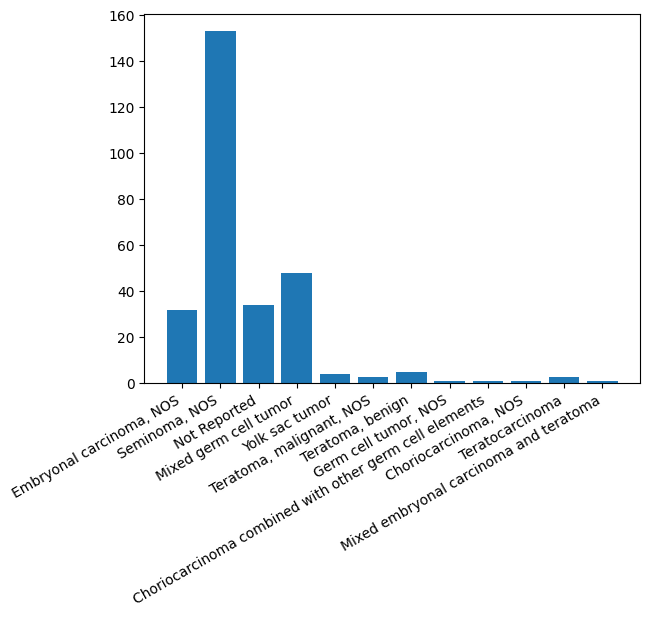

In [28]:
# all subtypes in the dataset
all_subtypes = {}

# look at alive vs dead?
status = {}

for i, patient in enumerate(clinical):
  id = patient['submitter_id']
  patient_status = patient['demographic']['vital_status']
  if patient_status not in status:
    status[patient_status] = 0
  status[patient_status] += 1
  diagnoses = patient['diagnoses']
  if len(diagnoses) == 1:
    subtype = diagnoses[0]['primary_diagnosis']
    if  subtype not in all_subtypes:
      all_subtypes[subtype] = 0
    all_subtypes[subtype] += 1
  else:
    # print(f'patient {id} on row {i} has muiltiple diagnoses')
    per_patient = set()
    for d in diagnoses:
      per_patient.add(d['primary_diagnosis'])
    # print('Has the subtypes:', multi)
    # lot of patients with this
    for d in per_patient:
      if d not in all_subtypes:
        all_subtypes[d] = 0
      all_subtypes[d] += 1

print('All subtypes found on this data:', all_subtypes)
ax = plt.subplot()
plt.bar(list(all_subtypes.keys()), list(all_subtypes.values()))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

All status' and frequency: {'Alive': 240, 'Not Reported': 16, 'Dead': 7}


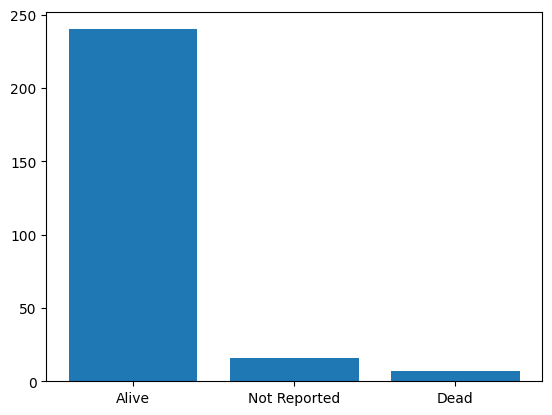

In [29]:
print('All status\' and frequency:', status)

plt.bar(range(len(status)), status.values(), align='center')
plt.xticks(range(len(status)), list(status.keys()))
plt.show()

# Genomic Data Input Features


In [30]:
def extract_tar_file(tar_path, extract_path='.'):
    """
    extracts contents of a tar file to the path specified
    """
    if not os.path.exists(tar_path):
        raise FileNotFoundError(f"The file {tar_path} does not exist.")

    with tarfile.open(tar_path, 'r:*') as tar:
        tar.extractall(path=extract_path)
        print(f"Extracted {tar_path} to {extract_path}")

In [31]:
%pwd

'/content/drive/My Drive/CSE428'

In [32]:
genomic_data_head = './data/tcga-tgct transcriptome data all/'
tar_path = f"{genomic_data_head}transcriptome-data.gz"
extract_path = f'{genomic_data_head}extracted-data'

# uncomment as needed
# extract_tar_file(tar_path, extract_path)

In [33]:
# read in genomic data as pandas

genomic_path = f'{genomic_data_head}extracted-data/'

genomic_data = pd.read_csv(f'{genomic_path}MANIFEST.txt', sep='\t')
# genomic_data.head()
genomic_data.loc[46]

,46
id,4e5db833-9922-498a-b527-ec01c26becb7
filename,4e5db833-9922-498a-b527-ec01c26becb7/c30e8fa6-...
md5,96544755786cc55cdb6da0cb7fa5091c
size,4254659
state,validated


In [34]:
def load_gdc_metadata(json_path):
    with open(json_path, 'r') as f:
        metadata = json.load(f)

    records = []
    for entry in metadata:
        file_id = entry.get("file_id")
        case_submitter_id = None

        # Look for case_submitter_id in associated_entities
        # elif "associated_entities" in entry and entry["associated_entities"]:
        case_submitter_id = entry["associated_entities"][0].get("entity_submitter_id")

        records.append({
            "file_id": file_id,
            "case_submitter_id": case_submitter_id
        })

    return pd.DataFrame(records)

metadata = load_gdc_metadata(f'{genomic_data_head}metadata-transcriptome.json')
print(len(metadata))
metadata.head()

156


,file_id,case_submitter_id
0,19e420a1-ac19-44e7-978e-65d08e3a6f21,TCGA-2G-AAFE-01A-11R-A430-07
1,dcb329dc-0b62-4785-8e8c-5b99ddbf78b6,TCGA-2G-AAF1-01A-11R-A430-07
2,6ac9d175-ee47-47f6-8cb8-683cd2696588,TCGA-2G-AAFL-01A-21R-A430-07
3,0aa2145c-8dfc-4d60-b160-853ef8dc8dd1,TCGA-XE-AAOC-01A-11R-A431-07
4,7ebf7ff8-8779-45cf-8972-514a703fc55b,TCGA-2G-AAGM-01A-11R-A430-07


In [35]:
row = get_row_of_id(clinical, 'TCGA-2G-AAFE', 'clinical', True)

# clinical[row]

found id: TCGA-2G-AAFE on row 36 of clinical


In [36]:
# truncate metadata's submitter id to the first 12 chars

def truncate_chars(x):
  if type(x) != float:
    return x[:12]

metadata['patient_id'] = metadata['case_submitter_id'].apply(truncate_chars)

metadata.head()

,file_id,case_submitter_id,patient_id
0,19e420a1-ac19-44e7-978e-65d08e3a6f21,TCGA-2G-AAFE-01A-11R-A430-07,TCGA-2G-AAFE
1,dcb329dc-0b62-4785-8e8c-5b99ddbf78b6,TCGA-2G-AAF1-01A-11R-A430-07,TCGA-2G-AAF1
2,6ac9d175-ee47-47f6-8cb8-683cd2696588,TCGA-2G-AAFL-01A-21R-A430-07,TCGA-2G-AAFL
3,0aa2145c-8dfc-4d60-b160-853ef8dc8dd1,TCGA-XE-AAOC-01A-11R-A431-07,TCGA-XE-AAOC
4,7ebf7ff8-8779-45cf-8972-514a703fc55b,TCGA-2G-AAGM-01A-11R-A430-07,TCGA-2G-AAGM


In [37]:
# see if theyr'e all unique

total = len(metadata)
unique_ids = len(metadata['patient_id'].unique())

print(f'Total of {total} rows and unique ids are {unique_ids}')

Total of 156 rows and unique ids are 150


In [38]:
# see what the repeated ids are

repeats = set()
seen = set()

for i, row in metadata.iterrows():
  id = row['patient_id']
  if id in seen:
    repeats.add(id)
  else:
    seen.add(id)

print(len(seen))
print(repeats)

150
{'TCGA-2G-AAGI', 'TCGA-2G-AAFG', 'TCGA-2G-AAHP', 'TCGA-2G-AAGY', 'TCGA-2G-AAKG', 'TCGA-2G-AAKO'}


In [39]:
# drop the dupes by sorting by the case id
# assuming that the case id later nubmers define the sample number
# want the earlier samples because that's where the prediction is most usefull

metadata = metadata.sort_values(by="case_submitter_id", ascending=True)

metadata_dedupe = metadata.drop_duplicates(subset="patient_id", keep="first")

print(len(metadata_dedupe))

150


In [40]:
# now we're ready to merge this with the output feature - subtype
# use the all_subtypes dictionary from plot above

full_data = []
seminoma_str = 'Seminoma, NOS'
not_reported_str = 'Not Reported'

for i, row in metadata.iterrows():
  id = row['patient_id'].strip()
  crow = get_row_of_id(clinical, id, 'clinical', False)

  subtype = clinical[crow]['diagnoses'][0]['primary_diagnosis'].strip()

  # get the file name from the genomic_data and add the column
  filename = None
  for j, f in genomic_data.iterrows():
    if f['id'].strip() == row['file_id']:
      filename = f['filename'].strip()
      break

  assert filename is not None, f"id: {id}, file_id: {row['file_id']} didn't have a filename"

  full_data.append({
      'file_id': row['file_id'],
      'filename': filename,
      'patient_id': id,
      'subtype': subtype,
      'is_seminoma': seminoma_str == subtype,
      'is_not_reported': not_reported_str == subtype
  })

input_data = pd.DataFrame(full_data)

input_data.head()

,file_id,filename,patient_id,subtype,is_seminoma,is_not_reported
0,4e5db833-9922-498a-b527-ec01c26becb7,4e5db833-9922-498a-b527-ec01c26becb7/c30e8fa6-...,TCGA-2G-AAEW,"Seminoma, NOS",True,False
1,d411f36e-ca07-4d82-8def-53c57117f8c2,d411f36e-ca07-4d82-8def-53c57117f8c2/a33810ed-...,TCGA-2G-AAEX,"Seminoma, NOS",True,False
2,dcb329dc-0b62-4785-8e8c-5b99ddbf78b6,dcb329dc-0b62-4785-8e8c-5b99ddbf78b6/8e9c17d9-...,TCGA-2G-AAF1,"Seminoma, NOS",True,False
3,7b24fc4b-1a0a-4307-9c94-72f0a182e5e8,7b24fc4b-1a0a-4307-9c94-72f0a182e5e8/e8e463a4-...,TCGA-2G-AAF4,"Seminoma, NOS",True,False
4,b4fdb8d0-d64c-41b2-866f-83e2d89d26fd,b4fdb8d0-d64c-41b2-866f-83e2d89d26fd/cfa597cd-...,TCGA-2G-AAF6,"Seminoma, NOS",True,False


In [41]:
print('Seminoma:', input_data['is_seminoma'].sum())
print('Non-Seminoma:', len(input_data['is_seminoma']) - input_data['is_seminoma'].sum())

Seminoma: 65
Non-Seminoma: 91


# Read All Transcriptome Data

- open up the files' data. Clean and dedupe the data. Then figure out the top 100-2000 genes that vary the most in those 150 files names from the `file_id` column

In [42]:
extracted_data_path = f'{genomic_data_head}extracted-data'

sum(os.path.isdir(os.path.join(extracted_data_path, entry)) \
    for entry in os.listdir(extracted_data_path))

156

In [43]:
# examine one file to see how the dupes work

example = input_data.loc[0]

FEATURE_COLUMN = 'fpkm_unstranded'

f_id = example['file_id']
f_path = example['filename']

full_path = os.path.join(genomic_data_head, f'extracted-data/{f_path}')

ex_df = pd.read_csv(full_path, sep="\t", comment="#")
ex_df = ex_df[~ex_df['gene_id'].str.startswith("N_")]

# see if only protein coding has dupes
# ex_df = ex_df[ex_df['gene_type'] == 'protein_coding']

ex_df = ex_df[ex_df[FEATURE_COLUMN] > 0]

ex_df.head()

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
4,ENSG00000000003.15,TSPAN6,protein_coding,7030,3545,3485,99.9475,25.4644,24.0429
5,ENSG00000000005.6,TNMD,protein_coding,15,8,7,0.6554,0.1670,0.1577
6,ENSG00000000419.13,DPM1,protein_coding,1848,914,934,98.7380,25.1563,23.7520
7,ENSG00000000457.14,SCYL3,protein_coding,1028,1076,1098,9.6317,2.4540,2.3170
8,ENSG00000000460.17,C1orf112,protein_coding,2155,1671,1717,23.2789,5.9310,5.5999


In [44]:
print(len(ex_df))

def remove_point(row):
  #print(row)
  row['gene_id'] = row['gene_id'].split('.')[0]

  row['gene_name'] = row['gene_name'].split('.')[0]
  return row

split_keys = ex_df.apply(remove_point, axis=1)
# print(split_keys.head())
print(len(split_keys['gene_id'].unique()))
print(len(split_keys['gene_name'].unique()))

35584
35584
32150


In [45]:
# visualize the dupes. the end goal is for this to be empty

id_dupe = split_keys[split_keys.duplicated(subset='gene_id', keep=False)]
id_dupe

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded


In [46]:
name_dupe = split_keys[split_keys.duplicated(subset='gene_name', keep=False)]

name_dupe = name_dupe.sort_values(by='gene_name')
name_dupe.head()

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
54286,ENSG00000277411,5S_rRNA,rRNA,3,1,2,1.8252,0.4650,0.4391
58132,ENSG00000285674,5S_rRNA,rRNA_pseudogene,1,1,0,0.5374,0.1369,0.1293
58068,ENSG00000285609,5S_rRNA,rRNA_pseudogene,2,2,0,1.0236,0.2608,0.2462
52202,ENSG00000273212,AC000068,lncRNA,7,514,523,0.9814,0.2500,0.2361
15889,ENSG00000185065,AC000068,lncRNA,125,78,74,3.8442,0.9794,0.9247


### Conclusion from above

No duplicates in the gene Ensemble ID (gene_id) when you remove all values of 0. Even if you keep not just protein coding gene types.

The name deduping is unnecessary.

### Next:

Find the top 100-1000 genes by ensemble id that vary the most.
- Reformats the data so that the columns are individual gene counts and each row is one patient. Will maintain the `is_seminoma` and `patient_id` column for the y-labels.

In [47]:
def load_expression_data(df, data_dir, value_col="fpkm_unstranded"):
    """
    Loads and cleans expression data for each file_id in a dictionary.

    Args:
        df (DataFrame): the input_data from above. Must have a file_id column,
          a filename column, and a patient id column
        data_dir (str): Root folder where expression files live.
        value_col (str): Which expression column to keep (e.g., 'fpkm_unstranded', 'fpkm_uq_unstranded').

    Returns tuple:
        dict: {file_id: cleaned pandas DataFrame},
        dataframe: Columns: patient_id, gene_id1, gene_id2, ... ... ...
          And per row for a patient, it has the value_col counts of that gene
    """
    cleaned_data = []
    cleaned_dict = {}
    for i, row in df.iterrows():
        relative_path = row['filename']
        file_id = row['file_id']
        file_path = os.path.join(data_dir, relative_path)
        try:
            df = pd.read_csv(file_path, sep="\t", comment="#")

            # Remove metadata rows (e.g. gene_id starts with 'N_')
            df = df[~df['gene_id'].str.startswith("N_")]

            # Keep only protein-coding genes
            # df = df[df["gene_type"] == "protein_coding"]

            # Drop rows where selected column is 0 or NaN
            df = df[df[value_col] > 0]

            cur_dict = dict(zip(df['gene_id'], df[value_col]))
            cur_dict['patient_id'] = row['patient_id']
            cur_dict['is_seminoma'] = row['is_seminoma']

            cleaned_data.append(cur_dict)

            cleaned_dict[row['patient_id']] = df
        except Exception as e:
            print(f"Error loading {file_id}: {e}")

    return pd.DataFrame(cleaned_data), cleaned_dict

In [48]:
gene_counts_df, all_genomic_dfs = load_expression_data(input_data, f'{genomic_data_head}extracted-data')
gene_counts_df.head()

<ipython-input-47-b739fe2f9fd2>:23: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t", comment="#")


,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000226700.1,ENSG00000283130.1,ENSG00000206915.1,ENSG00000207692.3,ENSG00000207814.1,ENSG00000244652.1,ENSG00000207746.1,ENSG00000212156.1,ENSG00000222457.1,ENSG00000264689.1
0,25.4644,0.1670,25.1563,2.4540,5.9310,11.1788,5.0115,5.6884,3.3936,16.8099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.4180,0.2692,34.5607,2.0439,4.0006,4.6850,3.8920,8.0742,2.3972,14.1407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.6718,0.1888,23.6876,2.5658,3.4680,8.2574,4.5202,5.2404,3.1137,20.7801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.2712,0.0344,33.2290,2.7547,5.0918,6.9817,2.8793,7.7186,3.6600,22.5155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.8948,NaN,31.3969,1.8028,4.0342,9.8270,1.2424,10.7883,2.6843,19.0982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
print(len(all_genomic_dfs))
all_genomic_dfs[input_data.loc[134]['patient_id']].head()

150


,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
4,ENSG00000000003.15,TSPAN6,protein_coding,4558,2280,2278,49.8351,16.8436,16.5849
5,ENSG00000000005.6,TNMD,protein_coding,2,0,2,0.0672,0.0227,0.0224
6,ENSG00000000419.13,DPM1,protein_coding,2364,1200,1164,97.1346,32.8302,32.3259
7,ENSG00000000457.14,SCYL3,protein_coding,1012,938,906,7.2918,2.4645,2.4267
8,ENSG00000000460.17,C1orf112,protein_coding,1276,1100,1063,10.6001,3.5827,3.5277


In [50]:
# sanity check again that the gene ids are all unique once removing 0 data
ex_df = all_genomic_dfs[input_data.loc[134]['patient_id']]
print(len(ex_df))
split_keys = ex_df.apply(remove_point, axis=1)
# print(split_keys.head())
print(len(split_keys['gene_id'].unique()))

36650
36650


In [51]:
def assert_patient_seminoma_column(df):
  assert 'patient_id' in df.keys() and 'is_seminoma' in df.keys()

assert_patient_seminoma_column(gene_counts_df)

In [52]:
# calculate variance of every gene and sort
print(len(gene_counts_df.keys())-2)
no_na = gene_counts_df.dropna(axis=1)
expr_only = no_na.drop(columns=["patient_id", 'is_seminoma'])
print(len(expr_only.keys()))
gene_variances = expr_only.var(axis=0, skipna=True)
top_genes = gene_variances.sort_values(ascending=False)

55821
17267


In [53]:
top_genes.head()
# top_genes.iloc[:10].keys()

,0
ENSG00000211592.8,2.278663e+08
ENSG00000198712.1,9.657785e+07
ENSG00000198804.2,7.669615e+07
ENSG00000198938.2,7.307006e+07
ENSG00000198886.2,7.155836e+07


In [54]:
def get_top_x_var_genes(top_genes_series, data_frame, x):
  '''
    top_genes_series - series with the variance as the values. Sorted in descending order
    data_frame - df that the top genes were calculated from (.var was called on)
      must have a patient_id column
    x - the amount of genes to return
  '''
  assert 0 <= x < len(top_genes)
  selected_genes = top_genes.iloc[:x]
  return data_frame[["patient_id", 'is_seminoma'] + selected_genes.index.tolist()]

In [55]:
top_genes_full = get_top_x_var_genes(top_genes, no_na, 5)
top_genes_full.head()

,patient_id,is_seminoma,ENSG00000211592.8,ENSG00000198712.1,ENSG00000198804.2,ENSG00000198938.2,ENSG00000198886.2
0,TCGA-2G-AAEW,True,487.1668,2183.4588,1912.6116,1420.4444,2017.3184
1,TCGA-2G-AAEX,True,26567.3930,5065.6001,3521.1562,2784.2614,4573.9803
2,TCGA-2G-AAF1,True,10947.4373,1541.3196,1331.4115,1166.5654,1830.4066
3,TCGA-2G-AAF4,True,4587.1363,4018.5344,2777.1337,3567.5626,3720.3954
4,TCGA-2G-AAF6,True,1636.0335,3078.6221,2218.0468,1399.9962,2164.5375


In [56]:
def plot_gene_variability_boxplots(df, gene_ids, figsize=(15, 6)):
    """
    Plots box and whisker plots of gene expression across patients for selected genes.

    Args:
        df (pd.DataFrame): Expression DataFrame with patients as rows, genes as columns.
        gene_ids (list): List of gene column names to plot.
        figsize (tuple): Figure size for the plot.
        rotate_xticks (bool): Whether to rotate x-axis gene labels for readability.
    """
    # Extract only the relevant gene columns (ignore 'patient_id' if present)
    data_to_plot = df[gene_ids]

    # Convert to long format for seaborn boxplot
    long_df = data_to_plot.melt(var_name="Gene", value_name="Expression")

    # Plot
    plt.figure(figsize=figsize)
    sns.boxplot(data=long_df, x="Gene", y="Expression", showfliers=True)

    plt.xticks(rotation=45)

    plt.title("Gene Expression Variability Across Patients")
    plt.xlabel("Gene")
    plt.ylabel("Expression Value")
    plt.tight_layout()
    plt.show()

In [57]:
top_genes.iloc[:5].keys() + top_genes.iloc[-5:].keys()
top_genes_drop = top_genes.dropna()
top_genes_drop.iloc[-8:-3]
top_genes.iloc[:5].keys().append(top_genes_drop.iloc[-8:-3].keys())

Index(['ENSG00000211592.8', 'ENSG00000198712.1', 'ENSG00000198804.2',
       'ENSG00000198938.2', 'ENSG00000198886.2', 'ENSG00000285219.2',
       'ENSG00000231881.2', 'ENSG00000138641.18', 'ENSG00000240498.9',
       'ENSG00000181215.15'],
      dtype='object')

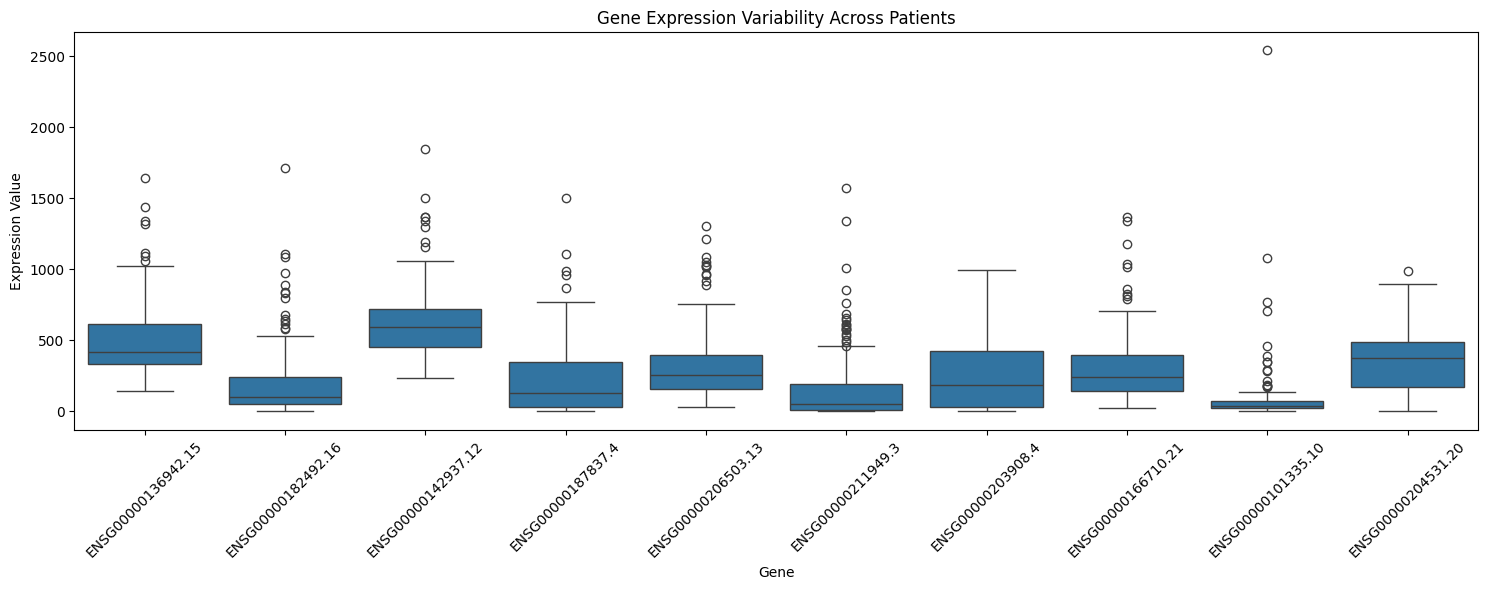

In [58]:
# top 5 and bottom 5
# plot_gene_variability_boxplots(gene_counts_df, top_genes.iloc[:5].keys().append(top_genes_drop.iloc[-8:-3].keys()))
plot_gene_variability_boxplots(gene_counts_df, top_genes.iloc[90:100].keys())

## Train Multiple Classifiers

Classify Seminoma / Non-seminoma with the top X gene count data sorted by variance.

Models Attempted:
- Random Forest
- k-NN
- Logistic Regression
- SVM
- MLP

In [59]:
# dependencies
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

In [60]:
# preprocess data, drop na gene counts
no_na = gene_counts_df.dropna(axis=1)

# get the top X variance genes
TOP_X_GENES = 500 # 2000

expr_only = no_na.drop(columns=["patient_id", 'is_seminoma'])
gene_variances = expr_only.var(axis=0, skipna=True)
top_genes = gene_variances.sort_values(ascending=False)

df_clean = get_top_x_var_genes(top_genes, no_na, TOP_X_GENES).copy()
assert_patient_seminoma_column(df_clean)

df_clean['label'] = df_clean['is_seminoma'].astype(int)

In [61]:
# create labels 'seminoma' = 0, 'non-seminoma' = 1

# print('Seminoma:', df_clean['label'].sum())
# print('Non-seminoma:', len(df_clean) - df_clean['label'].sum())

In [62]:
# get X columns and y column is now 'label'
gene_cols = [col for col in df_clean.columns if col not in ['patient_id', 'is_seminoma', 'label']]

X = df_clean[gene_cols]
y = df_clean['label']

# create train/test split
TEST_PERCENT = 0.20
X_dev, X_test, y_dev, y_test = train_test_split(X, y, stratify=y, test_size=TEST_PERCENT) # , random_state=11

scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)

In [63]:
print('x train len', len(X_dev))
print('x test len', len(X_test))
print('y train len', len(y_dev))
print('y test len', len(y_test))
print('seminoma in y train', y_dev.sum())
print('seminoma in y test', y_test.sum())

x train len 124
x test len 32
y train len 124
y test len 32
seminoma in y train 52
seminoma in y test 13


In [64]:
def plot_model_results(model_name, models_and_scores, hyperparams, cross_splits):
  """
    Plots the models_and_scores graph for one type of model across hyperparams.
    Returns train_accs, test_accs of the model
  """
  prs = []
  train_accs = []
  test_accs = []

  highest_test = -1
  index = 0

  for i, (avg_pr, name) in enumerate(models_and_scores):
    prs.append(avg_pr)

  prod = 1
  for hyperparam in hyperparams:
    prod *= len(hyperparam)
  x_pos = list(range(prod))

  plt.figure(figsize=(20, 5))
  plt.plot(x_pos, prs, marker='s', label='PR')
  plt.xticks(x_pos, [item[1] for item in models_and_scores], rotation=45)
  plt.xlabel('Model Params')
  plt.ylabel('Percentage')
  plt.title(f'Stats for Varying {model_name} Params: N_genes={TOP_X_GENES} Test %={TEST_PERCENT} Num folds={cross_splits}')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.tight_layout()
  plt.savefig(f'results/Stats for Varying {model_name} Params: N_genes={TOP_X_GENES} Test %={TEST_PERCENT} Num folds={cross_splits}.png')
  plt.show()

In [65]:
MODELS = {
    0: "Random Forest",
    1: "k-Nearest Neighbor",
    2: "Logistic Regression",
    3: "SVM",
    4: "MLP"
}

# cross validation
cross_splits = 4

def train_one_model(model_obj, models_and_scores, cv, cross_splits, verbose, name):
  """
    Trains one model using cross validation
    Params:
      model_obj: the model object. It must have a .fit function
      models_and_scores: running list of all the (model, best roc, best prauc, name) tuples
      cv: the cross validation object
      cross_splits: splits used in cross validation
      verbose: print more dialogue or not
      name: The associated parameters of this model. X ticks in the graph.
  """
  best_clf = None
  # best_roc = -1
  avg_pr = -1
  i = 1
  for train_idx, val_idx in cv.split(X_dev, y_dev):
      if verbose:
        print(f'---Cross Validation {i}/{cross_splits}')
      X_train, X_val = X_dev[train_idx], X_dev[val_idx]
      y_train, y_val = y_dev.iloc[train_idx], y_dev.iloc[val_idx]

      # clf = RandomForestClassifier(n_estimators=n, random_state=11)
      # clf = KNeighborsClassifier(n_neighbors=n)
      # clf = LogisticRegression(solver='liblinear', penalty='l2', max_iter=n, random_state=11, C=reg, dual=True)
      # clf = SVC(kernel='rbf', probability=True, random_state=11)
      # clf = MLPClassifier(hidden_layer_sizes=hl, learning_rate_init=lr, activation=act, max_iter=1000) #, random_state=11)
      clf = clone(model_obj)
      clf.fit(X_train, y_train)

      y_probs = clf.predict_proba(X_val)[:, 1]

      roc_auc = roc_auc_score(y_val, y_probs)

      pr_auc = average_precision_score(y_val, y_probs)

      avg_pr += pr_auc
      i += 1
  if verbose:
    print()
  avg_pr /= cross_splits
  # name = f"N: {n}, Hidden Size (hl): {hl}, reg: {reg}, lr: {lr}, activation: {act}"
  models_and_scores.append((avg_pr, name))

def train_models(model, verbose=True):
  """
    Params:
      model: between 0 and 4 inclusive. Refer to the MODELS dictionary for what each one refers to.
      verbose: Whether to have extra print statements.
    Returns:
      models_and_scores, train_accs, test_accs
  """
  assert 0 <= model <= 4
  # cross validation
  cv = StratifiedKFold(n_splits=cross_splits, shuffle=True) #, random_state=42)
  models_and_scores = []

  # make sure to set what clf is set to down below
  MODEL_NAME = MODELS[model] # "MLP" # "SVM" "Logistic Regression" "k-Nearest Neighbor" "Random Forest"

  # MLP
  if model == 4:
    n_ests = [1000] # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20] # [1, 10, 20, 30, 40, 50, 75, 85, 100, 200, 500, 750, 1000]
    reg_vals = [1] #[1e4, 1e3, 100, 10, 1, 0.1, 1e-2, 1e-3, 1e-4]
    hidden_layers = [(100,), (500,), (50,), (500, 100, 10), (200, 200, 200, 200), (64, 8)]
    lrs = [1e-1, 1e-2, 1e-3, 1e-4]
    activations = ['relu', 'tanh']
    hyperparams = [hidden_layers, lrs, activations]

    total = 1
    for h in hyperparams:
      total *= len(h)
    pbar = tqdm(total=total, desc=f"{MODEL_NAME} Models Trained", position=1)

    for hl in hidden_layers:
      if verbose:
        print('Testing size:', hl)
      for lr in lrs:
        if verbose:
          print('-Testing lr:', lr)
        for act in activations:
          if verbose:
            print('--Testing activation func:', act)
          clf = MLPClassifier(hidden_layer_sizes=hl, learning_rate_init=lr, activation=act, max_iter=1000)
          train_one_model(clf, models_and_scores, cv, cross_splits, verbose, f"Hidden Size (hl): {hl}, lr: {lr}, activation: {act}")
          pbar.update(1)
    pbar.close()

  # SVM
  elif model == 3:
    kernels = ['linear', 'rbf']
    hyperparams = [kernels]
    total = 1
    for h in hyperparams:
      total *= len(h)
    pbar = tqdm(total=total, desc=f"{MODEL_NAME} Models Trained", position=1)

    for kernel in kernels:
      if verbose:
        print('Testing kernel:', kernel)
      clf = SVC(kernel=kernel, probability=True)
      train_one_model(clf, models_and_scores, cv, cross_splits, verbose, f"Kernel: {kernel}")
      pbar.update(1)
    pbar.close()

  # Logistic Regression
  elif model == 2:
    n_ests = [1000] # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20] # [1, 10, 20, 30, 40, 50, 75, 85, 100, 200, 500, 750, 1000]
    reg_vals = [1e4, 1e3, 100, 10, 1, 0.1, 1e-2, 1e-3, 1e-4]
    log_options = [('liblinear', 'l2', True), ('liblinear', 'l2', False), ('liblinear', 'l1', False), ('newton-cholesky', 'l2', False), ('newton-cholesky', None, False), ('newton-cg', 'l2', False), ('newton-cg', None, False)]
    hyperparams = [reg_vals, log_options]
    total = 1
    for h in hyperparams:
      total *= len(h)
    pbar = tqdm(total=total, desc=f"{MODEL_NAME} Models Trained", position=1)

    for logistic in log_options:
      if verbose:
        print('Testing solver and penalty and dual:', logistic)
      for reg in reg_vals:
        if verbose:
          print('-Testing reg:', reg)

        clf = LogisticRegression(solver=logistic[0], penalty=logistic[1], max_iter=1000, C=reg, dual=logistic[2])
        train_one_model(clf, models_and_scores, cv, cross_splits, verbose, f"Solver: {logistic[0]}, penalty: {logistic[1]}, dual?: {logistic[2]}, reg: {reg}")
        pbar.update(1)
    pbar.close()

  # k-NN
  elif model == 1:
    n_ests = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20] # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20] # [1, 10, 20, 30, 40, 50, 75, 85, 100, 200, 500, 750, 1000]
    hyperparams = [n_ests]
    total = 1
    for h in hyperparams:
      total *= len(h)
    pbar = tqdm(total=total, desc=f"{MODEL_NAME} Models Trained", position=1)
    for n in n_ests:
      if verbose:
        print("Testing n:", n)

      clf = KNeighborsClassifier(n_neighbors=n)
      train_one_model(clf, models_and_scores, cv, cross_splits, verbose, f"N: {n}")
      pbar.update()
    pbar.close()

  # Random Forest
  elif model == 0:
    n_ests = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 75, 85, 100, 200, 500, 750, 1000] # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20] # [1, 10, 20, 30, 40, 50, 75, 85, 100, 200, 500, 750, 1000]
    hyperparams = [n_ests]
    total = 1
    for h in hyperparams:
      total *= len(h)
    pbar = tqdm(total=total, desc=f"{MODEL_NAME} Models Trained", position=1, leave=True)
    for n in n_ests:
      if verbose:
        print("Testing n:", n)

      clf = RandomForestClassifier(n_estimators=n) # , random_state=11)
      train_one_model(clf, models_and_scores, cv, cross_splits, verbose, f"N: {n}")
      pbar.update(1)
    pbar.close()

  # train_accs, test_accs =
  plot_model_results(MODEL_NAME, models_and_scores, hyperparams, cross_splits)

  return models_and_scores #, train_accs, test_accs


  0%|          | 0/5 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Training Random Forest models:



Random Forest Models Trained: 100%|██████████| 21/21 [00:26<00:00,  1.24s/it]


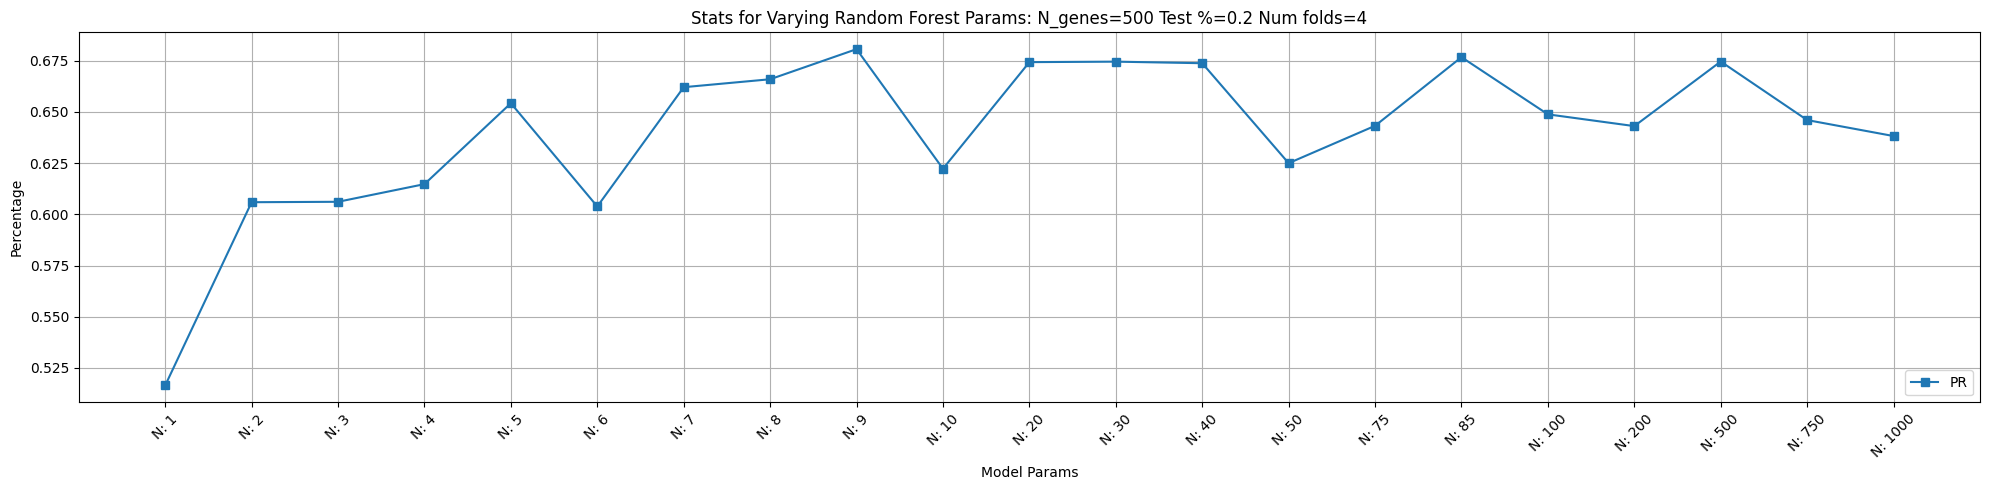

 20%|██        | 1/5 [00:26<01:47, 26.91s/it]

----------------------------------------------------------------------------------------------------
Training k-Nearest Neighbor models:



k-Nearest Neighbor Models Trained: 100%|██████████| 12/12 [00:00<00:00, 36.16it/s]


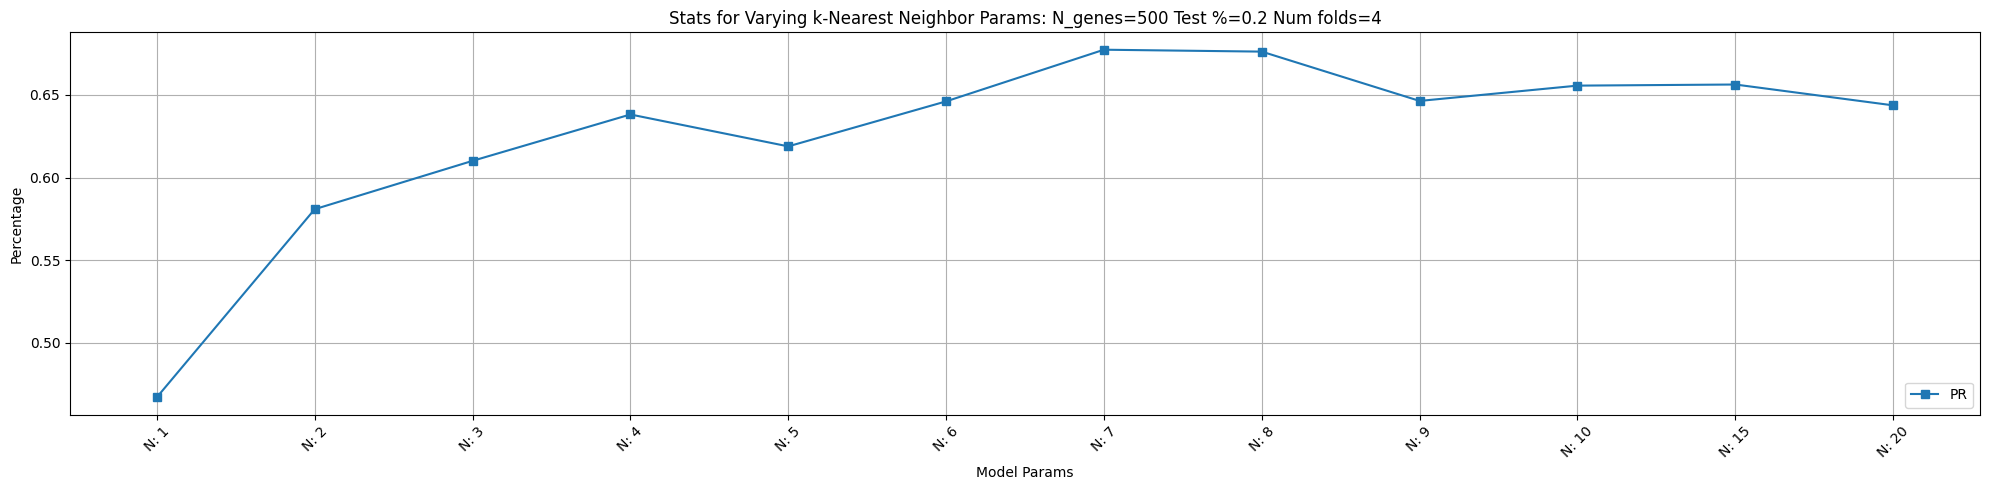

 40%|████      | 2/5 [00:27<00:35, 11.71s/it]

----------------------------------------------------------------------------------------------------
Training Logistic Regression models:



Logistic Regression Models Trained:  57%|█████▋    | 36/63 [00:13<00:17,  1.56it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=8.32284e-21): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warning

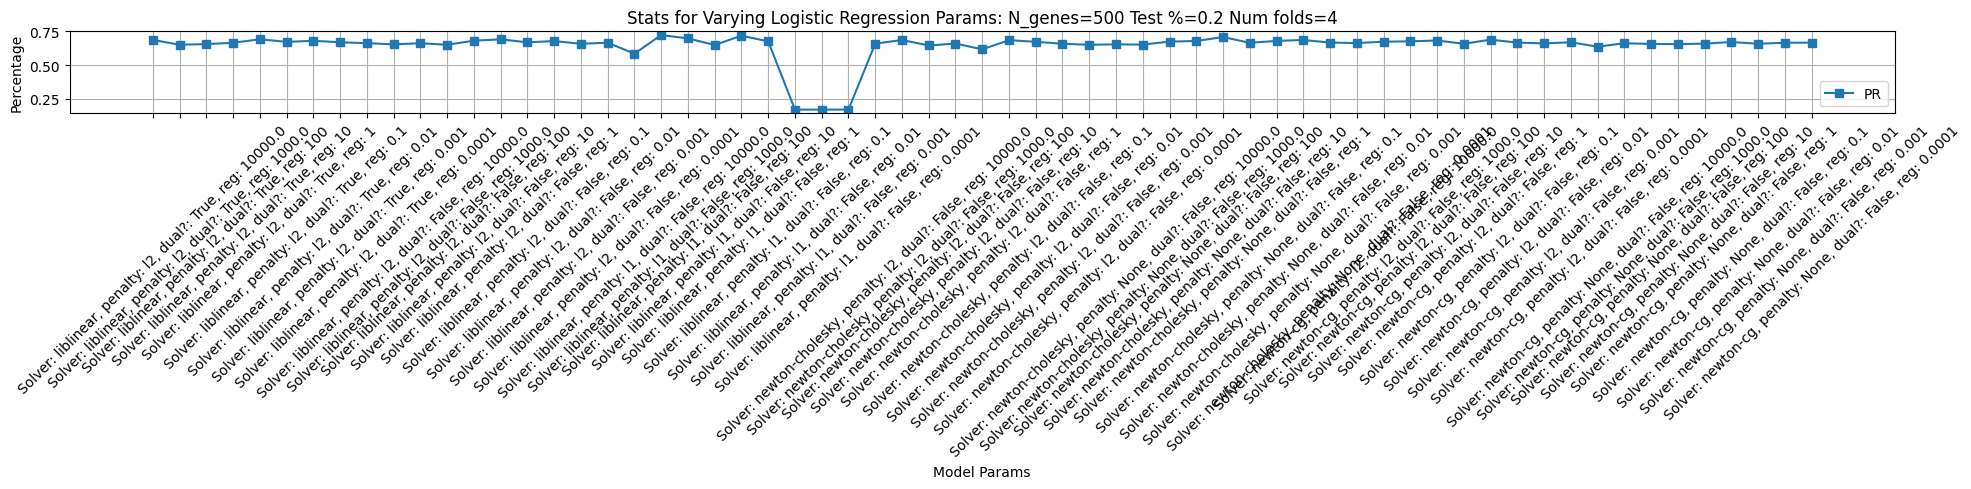

 60%|██████    | 3/5 [00:48<00:31, 15.93s/it]

----------------------------------------------------------------------------------------------------
Training SVM models:



SVM Models Trained: 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]


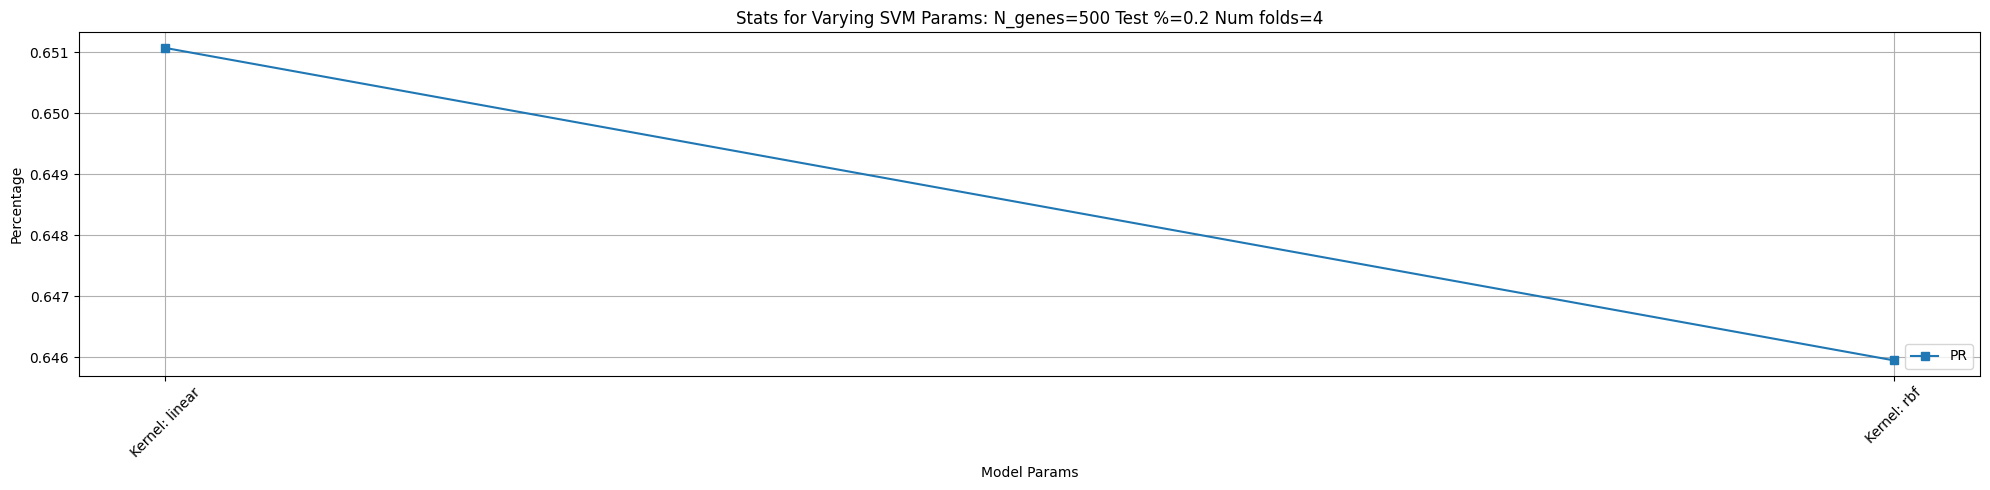

 80%|████████  | 4/5 [00:50<00:10, 10.09s/it]

----------------------------------------------------------------------------------------------------
Training MLP models:



MLP Models Trained: 100%|██████████| 48/48 [02:55<00:00,  3.65s/it]


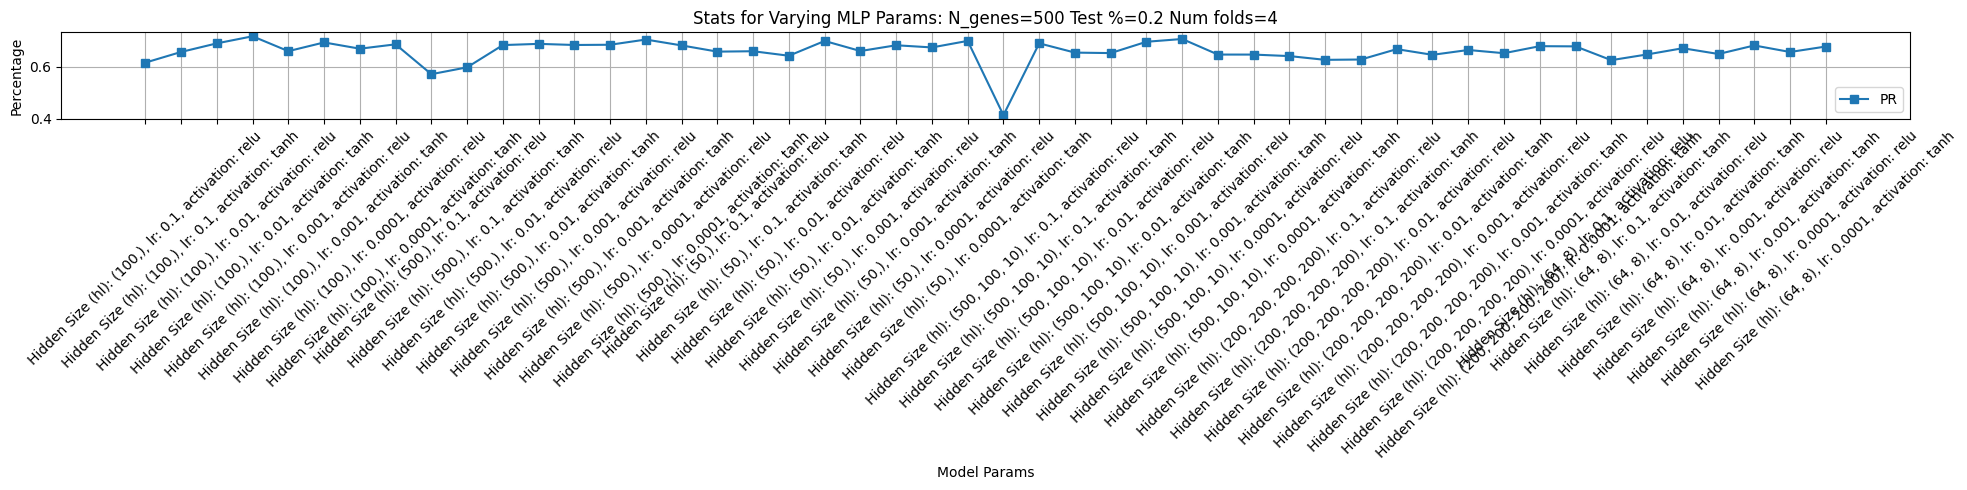

100%|██████████| 5/5 [03:46<00:00, 45.38s/it]


In [66]:
model_results = []

for index in tqdm(MODELS.keys(), position=0, leave=True):
  name = MODELS[index]
  print('-' * 100)
  print(f'Training {name} models:')
  model_results.append(train_models(index, False))

non-seminoma patients correctly classified (TN)

seminomas misclassified as non-seminomas (FP)

non-seminomas misclassified as seminomas (FN)

seminomas correctly classified (TP)


|TN|FP|
|--|--|
|FN|TP|

# Results

Argmax the pr auc from each different model and see which one is best.

Plot the auprc/roc/train acc/test acc of the best hyperparameters for each classifier.

In [67]:
def print_best_model_configs(model_results):
  """
    Arg:
      model_results (list): A list where each index is a tuple of:
            - models_and_scores (list of tuples): Each tuple has the form
              (avg_pr_auc_score, name) for a specific hyperparameter config.
  """
  best_configs = []
  for model_configs in model_results:
    best_pr = -1
    best_names = []
    if model_configs == None:
      continue
    for model in model_configs:
      avg_pr, name = model

      if avg_pr > best_pr:
        best_pr = avg_pr

    for model in model_configs:
      pr, name = model

      if pr >= best_pr:
        best_names.append(name)

    best_configs.append((best_pr, best_names))

  for i, config in enumerate(best_configs):
    model_name = MODELS[i]
    pr, names = config
    print(f'Best {model_name} configs with pr: {pr}\n\t-{names}')
  return best_configs


In [68]:
best_configs = print_best_model_configs(model_results)

Best Random Forest configs with pr: 0.6806823643927716
	-['N: 9']
Best k-Nearest Neighbor configs with pr: 0.67742673992674
	-['N: 7']
Best Logistic Regression configs with pr: 0.7224666892936121
	-['Solver: liblinear, penalty: l1, dual?: False, reg: 1000.0']
Best SVM configs with pr: 0.6510695642341569
	-['Kernel: linear']
Best MLP configs with pr: 0.7172754862658706
	-['Hidden Size (hl): (100,), lr: 0.01, activation: tanh']


In [69]:
def plot_cross_model_results(models_and_scores):
  """
    Plots the models_and_scores graph across the multiple types. Each index must correspond to the model type in the MODELS dict.
    Each index in models_and_scores should have the format:
      (clf_model_instance, roc, pr, train_acc, test_acc)
  """
  rocs = list([x[1] for x in models_and_scores])
  prs = list([x[2] for x in models_and_scores])
  train_accs = list([x[3] for x in models_and_scores])
  test_accs = list([x[4] for x in models_and_scores])

  x_pos = list(range(len(MODELS)))

  plt.figure(figsize=(20, 5))
  plt.plot(x_pos, rocs, marker='o', label='ROC')
  plt.plot(x_pos, prs, marker='s', label='PR')
  plt.plot(x_pos, train_accs, marker='v', label='Train Acc')
  plt.plot(x_pos, test_accs, marker='^', label='Test Acc')
  plt.xticks(x_pos, [MODELS[i] for i in range(len(MODELS))], rotation=45)
  plt.xlabel('Model Type')
  plt.ylabel('Percentage')
  plt.title(f'Stats for Varying Model Types: N_genes={TOP_X_GENES} Test %={TEST_PERCENT}')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.tight_layout()
  plt.savefig(f'results/Stats for Varying Model Types: N_genes={TOP_X_GENES} Test %={TEST_PERCENT}.png')
  plt.show()

  # return train_accs, test_accs

def train_one_model_full(model_obj, verbose, name):
  """
    Trains one model using the full train data. Similar to above, but doesn't use cross validation
    Params:
      model_obj: the model object. It must have a .fit function
      verbose: print more dialogue or not
      name: The associated parameters of this model. X ticks in the graph.
    Returns:
      Tuple in the form: (clf, roc, pr, train_acc, test_acc) of this model
  """
  if verbose:
    print(f'---Training {name} on full train data')

  # clf = RandomForestClassifier(n_estimators=n, random_state=11)
  # clf = KNeighborsClassifier(n_neighbors=n)
  # clf = LogisticRegression(solver='liblinear', penalty='l2', max_iter=n, random_state=11, C=reg, dual=True)
  # clf = SVC(kernel='rbf', probability=True, random_state=11)
  # clf = MLPClassifier(hidden_layer_sizes=hl, learning_rate_init=lr, activation=act, max_iter=1000) #, random_state=11)
  clf = clone(model_obj)
  clf.fit(X_dev, y_dev)

  y_probs = clf.predict_proba(X_test)[:, 1]

  roc_auc = roc_auc_score(y_test, y_probs)

  pr_auc = average_precision_score(y_test, y_probs)
  if verbose:
    print(f'ROC: {roc_auc}, PR: {pr_auc}')
  y_dev_pred = clf.predict(X_dev)
  mat = confusion_matrix(y_dev, y_dev_pred)
  # TP + FN / total
  train_acc = (mat[0, 0] + mat[1, 1]) / mat.sum()

  y_pred = clf.predict(X_test)
  mat = confusion_matrix(y_test, y_pred)
  test_acc = (mat[0, 0] + mat[1, 1]) / mat.sum()

  if verbose:
    print(f'Train acc: {train_acc}, Test acc: {test_acc}')
    print()
  return clf, roc_auc, pr_auc, train_acc, test_acc

def train_best_models(verbose=True):
  """
    Very similar to the method above, but instead of grid searching hyperparams, it will train the best CV results on the full train data.
    Params:
      verbose: Whether to have extra print statements.
    Returns:
      models_and_scores, train_accs, test_accs
  """

  pbar = tqdm(total=len(MODELS), desc="Models trained", position=0)
  models_and_scores = []

  # train best random forest
  n = 9

  clf = RandomForestClassifier(n_estimators=n) # , random_state=11)
  models_and_scores.append(train_one_model_full(clf, verbose, f"N: {n}"))
  pbar.update(1)
  pbar.close()

  # train best knn
  n = 5

  clf = KNeighborsClassifier(n_neighbors=n)
  models_and_scores.append(train_one_model_full(clf, verbose, f"N: {n}"))
  pbar.update()

  # train best logistic regression
  reg = 1
  logistic = ('liblinear', 'l1', False)

  clf = LogisticRegression(solver=logistic[0], penalty=logistic[1], max_iter=1000, C=reg, dual=logistic[2])
  models_and_scores.append(train_one_model_full(clf, verbose, f"Solver: {logistic[0]}, penalty: {logistic[1]}, dual?: {logistic[2]}, reg: {reg}"))
  pbar.update(1)

  # train best svm
  kernel = 'linear'
  clf = SVC(kernel=kernel, probability=True)
  models_and_scores.append(train_one_model_full(clf, verbose, f"Kernel: "))
  pbar.update(1)

  # train best MLP
  hl = (500, 100, 10)
  lr = 0.01
  act = 'tanh'

  clf = MLPClassifier(hidden_layer_sizes=hl, learning_rate_init=lr, activation=act, max_iter=1000)
  models_and_scores.append(train_one_model_full(clf, verbose, f"Hidden Size (hl): {hl}, lr: {lr}, activation: {act}"))
  pbar.update(1)


  plot_cross_model_results(models_and_scores)

  return models_and_scores

Models trained:  20%|██        | 1/5 [00:00<00:00, 16.19it/s]


---Training N: 9 on full train data
ROC: 0.9939271255060729, PR: 0.9835164835164834
Train acc: 1.0, Test acc: 0.96875

---Training N: 5 on full train data
ROC: 0.902834008097166, PR: 0.7843406593406594
Train acc: 0.9274193548387096, Test acc: 0.84375

---Training Solver: liblinear, penalty: l1, dual?: False, reg: 1 on full train data
ROC: 0.9514170040485831, PR: 0.8652644364182825
Train acc: 1.0, Test acc: 0.9375

---Training Kernel:  on full train data
ROC: 0.9392712550607287, PR: 0.891304208611901
Train acc: 1.0, Test acc: 0.84375

---Training Hidden Size (hl): (500, 100, 10), lr: 0.01, activation: tanh on full train data
ROC: 0.9433198380566801, PR: 0.9150335775335776
Train acc: 1.0, Test acc: 0.875



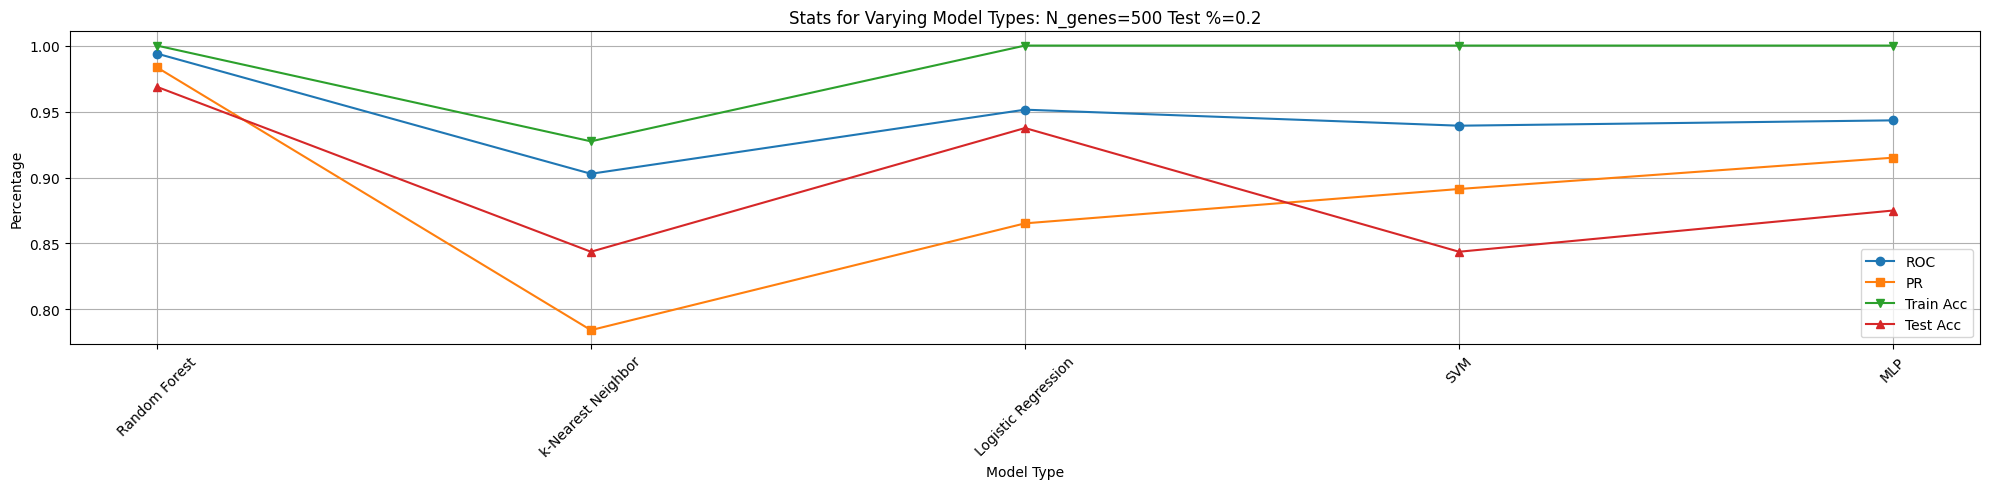

In [70]:
models_and_scores = train_best_models(verbose=True)

In [71]:
def setup_sub_ax(ax, substr, labels, best_scores):
  bars = ax.bar(labels, best_scores, color='skyblue')

  # Annotate bars with substat values
  for bar, score in zip(bars, best_scores):
      ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
              f"{score:.3f}", ha='center', va='bottom')
  ax.set_title(f"Best {substr} per Model Type")
  ax.set_ylabel(substr)
  ax.set_ylim(0, 1.05)
  # ax.set_xticks(rotation=45)
  ax.tick_params(axis='x', rotation=45)
  ax.grid(axis='y', linestyle='--', alpha=0.6)

def plot_best_stat_per_model(models_and_Scores):
    """
    Plot the best substat score for each model type.

    For each model type in the `models_and_scores` list, this function plots the pr, roc, train and test accuracy.
    Each bar corresponds to one model type (e.g., Random Forest, SVM) and is
    labeled with the value of its top-performing configuration.

    Args:
        models_and_scores (list): A list where each index is a tuple of:
            - (model, roc, pr, train_acc, test_acc)
    Returns:
        None
    """
    labels = []
    best_roc = []
    best_train = []
    best_test = []
    best_pr = []
    for model_idx, (model, roc, pr, train_acc, test_acc) in enumerate(models_and_scores):
      best_pr.append(pr)
      best_roc.append(roc)
      best_train.append(train_acc)
      best_test.append(test_acc)
      labels.append(MODELS[model_idx])# + " " + best_entry[3]) # best_entry[3] = name

    # plot all 4 substats for each model type comparisson

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
    plt.title(f"N_genes={TOP_X_GENES} Test %={TEST_PERCENT} Num folds={cross_splits}")
    setup_sub_ax(axes[0, 0], "PR AUC", labels, best_pr)
    setup_sub_ax(axes[0, 1], "ROC", labels, best_roc)
    setup_sub_ax(axes[1, 0], "Train Accuracy", labels, best_train)
    setup_sub_ax(axes[1, 1], "Test Accuracy", labels, best_test)
    # Optional: Adjust layout
    plt.tight_layout()
    plt.savefig(f'Best Model\'s substats per each Model Type For N_genes={TOP_X_GENES} Test %={TEST_PERCENT} Num folds={cross_splits}.png')
    plt.show()


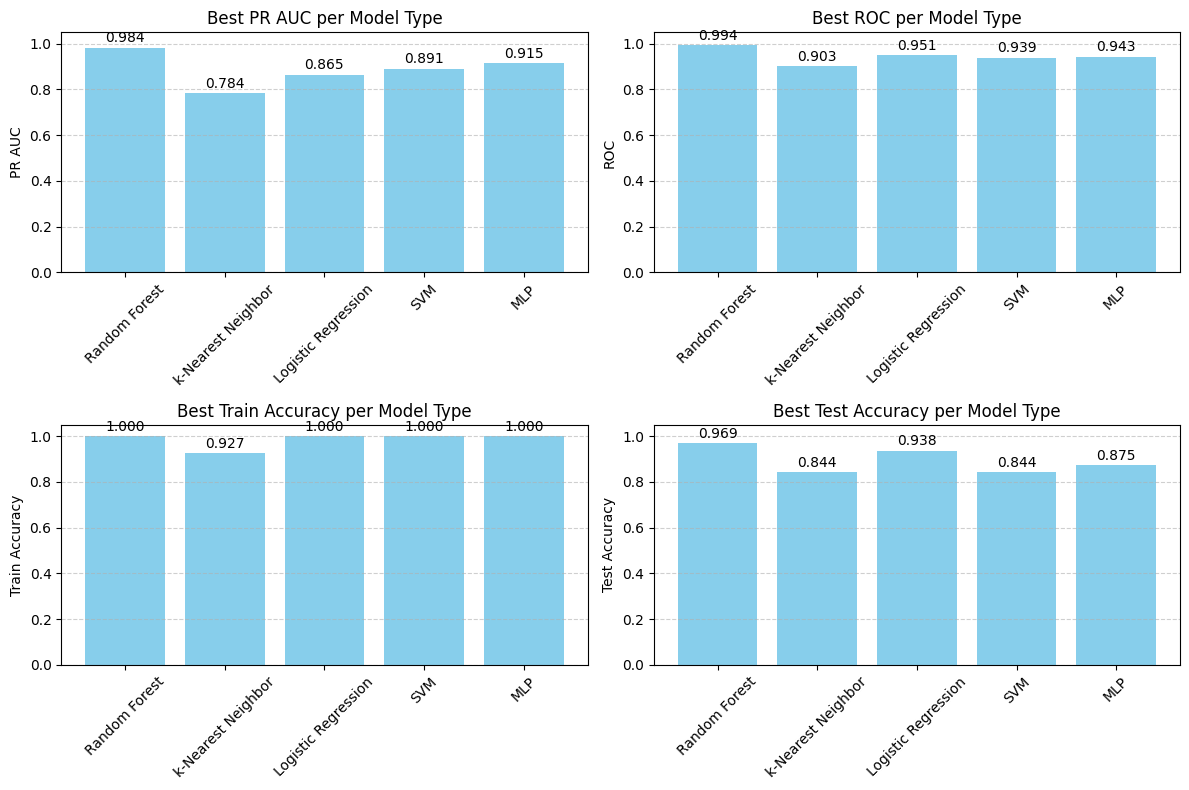

In [72]:
plot_best_stat_per_model(models_and_scores)

In [73]:
# see stats for best model
# index is based on x-axis above
# 0 for model
# per model indexes based on MODELS dict
model_viewing = 0
print(f'Viewing models {MODELS[model_viewing]}')
tup = models_and_scores[model_viewing]
# see = best_indexes[model_viewing]
# tup = models_and_scores[see]
# print(f'Best model\'s test acc: ')
clf = tup[0]
print(f'Model, prauc, roc, model name: {tup}')

Viewing models Random Forest
Model, prauc, roc, model name: (RandomForestClassifier(n_estimators=9), np.float64(0.9939271255060729), np.float64(0.9835164835164834), np.float64(1.0), np.float64(0.96875))


In [74]:
# get train acc and test acc plotted
y_train_pred = clf.predict(X_dev)

print('Train Confusion Matrix:')
print(confusion_matrix(y_dev, y_train_pred))
print()


Train Confusion Matrix:
[[72  0]
 [ 0 52]]



In [75]:
y_pred = clf.predict(X_test)
print(y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-seminoma', 'Seminoma']))

[0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0]
Confusion Matrix:
[[18  1]
 [ 0 13]]

Classification Report:
              precision    recall  f1-score   support

Non-seminoma       1.00      0.95      0.97        19
    Seminoma       0.93      1.00      0.96        13

    accuracy                           0.97        32
   macro avg       0.96      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



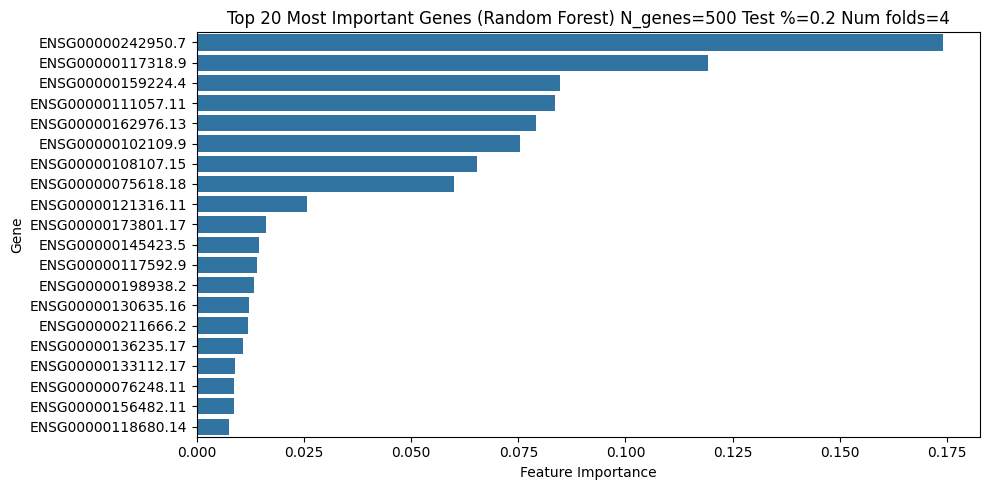

In [76]:
# Random Forest Analysis
# will throw an error if any other classifier is tested

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:20]]
top_importances = importances[indices[:20]]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_importances, y=top_features)
plt.title(f"Top 20 Most Important Genes (Random Forest) N_genes={TOP_X_GENES} Test %={TEST_PERCENT} Num folds={cross_splits}")
plt.xlabel("Feature Importance")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

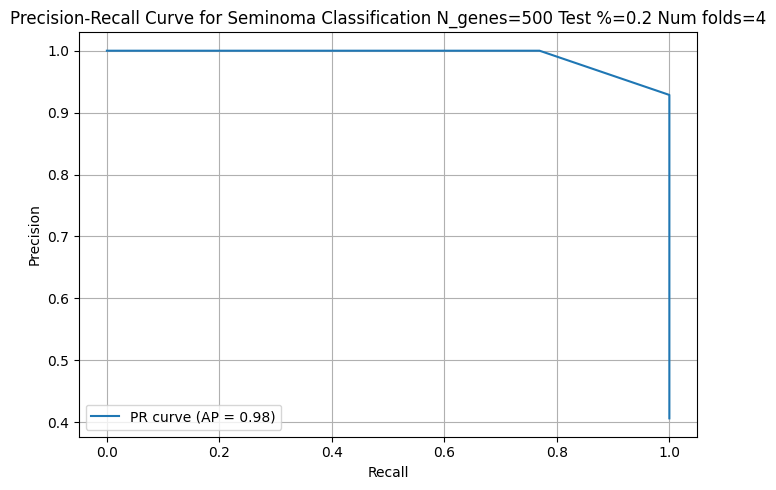

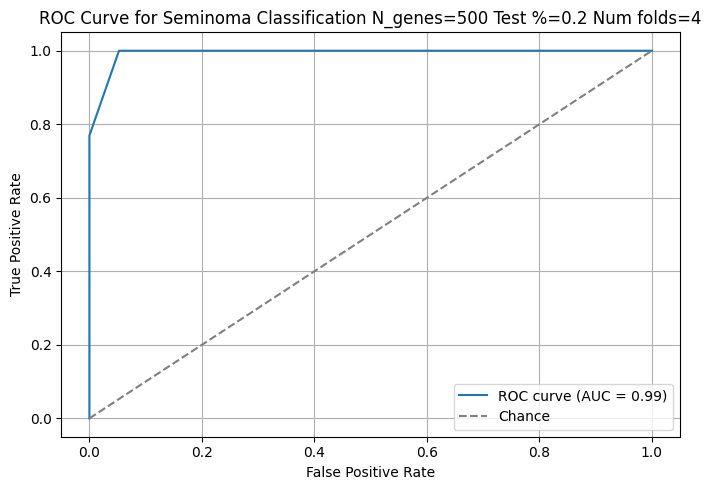

In [77]:
# Get predicted probabilities for the positive class (seminoma = 1)
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute PR curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot precision recall
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for Seminoma Classification N_genes={TOP_X_GENES} Test %={TEST_PERCENT} Num folds={cross_splits}')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot ROC and AUC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Seminoma Classification N_genes={TOP_X_GENES} Test %={TEST_PERCENT} Num folds={cross_splits}')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
